In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('BPdata_tr.txt')
data

,x1,x2,y
0,0.065735,0.044223,0.006277
1,0.049985,0.334657,0.114494
2,0.541525,0.027610,0.294011
3,0.038182,0.284811,0.082575
4,0.262401,0.198246,0.108156
...,...,...,...
495,0.343548,0.500284,0.368309
496,0.259262,0.558471,0.379106
497,0.297697,0.123911,0.103977
498,0.507976,0.304445,0.350726


网络激活函数

In [1]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

网络输入值

In [ ]:
net_in = np.array([0.0657351901289076,0.0442229966167361,-1])
net_in

array([ 0.06573519,  0.044223  , -1.        ])

输出层的输入（隐层的输出）

In [ ]:
out_in = np.array([0.0, 0.0, 0.0, 0.0, -1])
out_in

array([ 0.,  0.,  0.,  0., -1.])

隐层神经元的权值&阈值

In [ ]:
w_mid = np.zeros([3,4])
w_mid

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

输出层的神经元的权值&阈值

In [ ]:
w_out = np.zeros([5])
w_out

array([0., 0., 0., 0., 0.])

从输入层到隐层的传输过程

In [ ]:
for i in range(4):
#     nei_in * 所有行的第零列，然后加权求和
    out_in[i] = sigmoid(sum(net_in * w_mid[:,0]))
print(out_in)

[ 0.5  0.5  0.5  0.5 -1. ]


模型预测值

In [ ]:
res = sigmoid(sum(out_in * w_out))
res

0.5

In [ ]:
real = 0.00627678865104747

In [ ]:
delta_w_out = np.zeros([5])   #输出层权值&阈值的修正量
delta_w_mid = np.zeros([3,4])  #中间层权值&阈值修正量

# 总结到一起

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('BPdata_tr.txt')
def sigmoid(x):
    return 1/(1+np.exp(-x))
net_in = np.array([0.0657351901289076,0.0442229966167361,-1])
out_in = np.array([0.0, 0.0, 0.0, 0.0, -1])
w_mid = np.zeros([3,4])
w_out = np.zeros([5])
for i in range(4):
#     nei_in * 所有行的第零列，然后加权求和
    out_in[i] = sigmoid(sum(net_in * w_mid[:,0]))
res = sigmoid(sum(out_in * w_out))
real = 0.00627678865104747
delta_w_out = np.zeros([5])   #输出层权值&阈值的修正量
delta_w_mid = np.zeros([3,4])  #中间层权值&阈值修正量

# 权值修正

In [ ]:
yita = 0.5

In [ ]:
delta_w_out = yita * res * (1-res)*(real-res) * out_in   #输出层权值的修正量
delta_w_out

array([-0.0308577, -0.0308577, -0.0308577, -0.0308577,  0.0617154])

输出神经元的阈值放在delta_w_out最后一个元素

In [ ]:
delta_w_out[4] = -yita * res * (1-res) * (real-res)     #输出层阈值的修正量
delta_w_out[4]

0.061715401418619066

In [ ]:
w_out = w_out + delta_w_out  #更新

隐层权值修正

In [ ]:
for i in range(4):
    delta_w_mid[:, i] = yita * out_in[i] * (1-out_in[i]) * w_out[i] * res * (1-res) * (real-res) * net_in  #中间层神经元的权值修正量
    delta_w_mid[2, i] = -yita * out_in[i] * (1-out_in[i]) * w_out[i] * res * (1-res) * (real-res)   #中间层神经元阈值修正量

In [ ]:
w_mid = w_mid + delta_w_mid   #更新

In [ ]:
for i in range(4):
#     nei_in * 所有行的第零列，然后加权求和
    out_in[i] = sigmoid(sum(net_in * w_mid[:,0]))
print(out_in)

[ 0.50011977  0.50011977  0.50011977  0.50011977 -1.        ]


In [ ]:
res = sigmoid(sum(out_in * w_out))
res

0.46917773469833685

# 总结到一起

In [ ]:
for it in range(10000):
    yita = 1.5   #学习速率
    delta_w_out = yita * res * (1-res)*(real-res) * out_in   #输出层权值的修正量
    delta_w_out[4] = -yita * res * (1-res) * (real-res)     #输出层阈值的修正量
    w_out = w_out + delta_w_out  #更新
    for i in range(4):
        delta_w_mid[:, i] = yita * out_in[i] * (1-out_in[i]) * w_out[i] * res * (1-res) * (real-res) * net_in  #中间层神经元的权值修正量
        delta_w_mid[2, i] = -yita * out_in[i] * (1-out_in[i]) * w_out[i] * res * (1-res) * (real-res)   #中间层神经元阈值修正量
    w_mid = w_mid + delta_w_mid   #更新
    for i in range(4):
#     nei_in * 所有行的第零列，然后加权求和
        out_in[i] = sigmoid(sum(net_in * w_mid[:,0]))
    res = sigmoid(sum(out_in * w_out))
    print("第",it,"次训练的模型输出:",res,"real:",real)

第 0 次训练的模型输出: 0.3846200596075242 real: 0.00627678865104747
第 1 次训练的模型输出: 0.3228871772206832 real: 0.00627678865104747
第 2 次训练的模型输出: 0.27870488192690834 real: 0.00627678865104747
第 3 次训练的模型输出: 0.24633052496571997 real: 0.00627678865104747
第 4 次训练的模型输出: 0.22179863395704635 real: 0.00627678865104747
第 5 次训练的模型输出: 0.2026081393723596 real: 0.00627678865104747
第 6 次训练的模型输出: 0.18717964963277528 real: 0.00627678865104747
第 7 次训练的模型输出: 0.17448841999966247 real: 0.00627678865104747
第 8 次训练的模型输出: 0.16384751613821422 real: 0.00627678865104747
第 9 次训练的模型输出: 0.15478162660752845 real: 0.00627678865104747
第 10 次训练的模型输出: 0.14695225088577907 real: 0.00627678865104747
第 11 次训练的模型输出: 0.14011206674037122 real: 0.00627678865104747
第 12 次训练的模型输出: 0.13407624225415768 real: 0.00627678865104747
第 13 次训练的模型输出: 0.1287038686353837 real: 0.00627678865104747
第 14 次训练的模型输出: 0.12388561544206524 real: 0.00627678865104747
第 15 次训练的模型输出: 0.11953531899565754 real: 0.00627678865104747
第 16 次训练的模型输出: 0.11558412197060303 rea

第 216 次训练的模型输出: 0.029597559736135898 real: 0.00627678865104747
第 217 次训练的模型输出: 0.029529434102825325 real: 0.00627678865104747
第 218 次训练的模型输出: 0.029461797043671214 real: 0.00627678865104747
第 219 次训练的模型输出: 0.029394642835069068 real: 0.00627678865104747
第 220 次训练的模型输出: 0.02932796584623431 real: 0.00627678865104747
第 221 次训练的模型输出: 0.02926176053728358 real: 0.00627678865104747
第 222 次训练的模型输出: 0.029196021457364173 real: 0.00627678865104747
第 223 次训练的模型输出: 0.029130743242830118 real: 0.00627678865104747
第 224 次训练的模型输出: 0.02906592061546366 real: 0.00627678865104747
第 225 次训练的模型输出: 0.029001548380740795 real: 0.00627678865104747
第 226 次训练的模型输出: 0.02893762142613932 real: 0.00627678865104747
第 227 次训练的模型输出: 0.028874134719488687 real: 0.00627678865104747
第 228 次训练的模型输出: 0.02881108330735993 real: 0.00627678865104747
第 229 次训练的模型输出: 0.02874846231349479 real: 0.00627678865104747
第 230 次训练的模型输出: 0.028686266937272987 real: 0.00627678865104747
第 231 次训练的模型输出: 0.02862449245221621 real: 0.00627678865104747

第 442 次训练的模型输出: 0.020890715378070183 real: 0.00627678865104747
第 443 次训练的模型输出: 0.020868406589631627 real: 0.00627678865104747
第 444 次训练的模型输出: 0.020846176338908663 real: 0.00627678865104747
第 445 次训练的模型输出: 0.02082402417401668 real: 0.00627678865104747
第 446 次训练的模型输出: 0.02080194964668131 real: 0.00627678865104747
第 447 次训练的模型输出: 0.020779952312201668 real: 0.00627678865104747
第 448 次训练的模型输出: 0.020758031729413942 real: 0.00627678865104747
第 449 次训练的模型输出: 0.020736187460655357 real: 0.00627678865104747
第 450 次训练的模型输出: 0.020714419071728708 real: 0.00627678865104747
第 451 次训练的模型输出: 0.02069272613186726 real: 0.00627678865104747
第 452 次训练的模型输出: 0.02067110821370011 real: 0.00627678865104747
第 453 次训练的模型输出: 0.020649564893217925 real: 0.00627678865104747
第 454 次训练的模型输出: 0.020628095749739183 real: 0.00627678865104747
第 455 次训练的模型输出: 0.020606700365876772 real: 0.00627678865104747
第 456 次训练的模型输出: 0.02058537832750495 real: 0.00627678865104747
第 457 次训练的模型输出: 0.020564129223726864 real: 0.006276788651047

第 652 次训练的模型输出: 0.017442090584935444 real: 0.00627678865104747
第 653 次训练的模型输出: 0.0174299366567608 real: 0.00627678865104747
第 654 次训练的模型输出: 0.017417811837778987 real: 0.00627678865104747
第 655 次训练的模型输出: 0.017405716014317115 real: 0.00627678865104747
第 656 次训练的模型输出: 0.01739364907331921 real: 0.00627678865104747
第 657 次训练的模型输出: 0.017381610902341842 real: 0.00627678865104747
第 658 次训练的模型输出: 0.01736960138955003 real: 0.00627678865104747
第 659 次训练的模型输出: 0.017357620423712857 real: 0.00627678865104747
第 660 次训练的模型输出: 0.017345667894199394 real: 0.00627678865104747
第 661 次训练的模型输出: 0.01733374369097453 real: 0.00627678865104747
第 662 次训练的模型输出: 0.017321847704594925 real: 0.00627678865104747
第 663 次训练的模型输出: 0.017309979826204816 real: 0.00627678865104747
第 664 次训练的模型输出: 0.01729813994753209 real: 0.00627678865104747
第 665 次训练的模型输出: 0.017286327960884244 real: 0.00627678865104747
第 666 次训练的模型输出: 0.0172745437591444 real: 0.00627678865104747
第 667 次训练的模型输出: 0.017262787235767352 real: 0.00627678865104747


第 877 次训练的模型输出: 0.015277178716825634 real: 0.00627678865104747
第 878 次训练的模型输出: 0.015269541751562697 real: 0.00627678865104747
第 879 次训练的模型输出: 0.015261918442605707 real: 0.00627678865104747
第 880 次训练的模型输出: 0.015254308750281973 real: 0.00627678865104747
第 881 次训练的模型输出: 0.015246712635079013 real: 0.00627678865104747
第 882 次训练的模型输出: 0.015239130057643723 real: 0.00627678865104747
第 883 次训练的模型输出: 0.015231560978781566 real: 0.00627678865104747
第 884 次训练的模型输出: 0.015224005359455697 real: 0.00627678865104747
第 885 次训练的模型输出: 0.015216463160786243 real: 0.00627678865104747
第 886 次训练的模型输出: 0.015208934344049466 real: 0.00627678865104747
第 887 次训练的模型输出: 0.01520141887067689 real: 0.00627678865104747
第 888 次训练的模型输出: 0.015193916702254614 real: 0.00627678865104747
第 889 次训练的模型输出: 0.01518642780052242 real: 0.00627678865104747
第 890 次训练的模型输出: 0.015178952127373054 real: 0.00627678865104747
第 891 次训练的模型输出: 0.015171489644851426 real: 0.00627678865104747
第 892 次训练的模型输出: 0.015164040315153803 real: 0.006276788651

第 1105 次训练的模型输出: 0.013826277963574829 real: 0.00627678865104747
第 1106 次训练的模型输出: 0.013820969555072532 real: 0.00627678865104747
第 1107 次训练的模型输出: 0.013815668716726317 real: 0.00627678865104747
第 1108 次训练的模型输出: 0.013810375431072719 real: 0.00627678865104747
第 1109 次训练的模型输出: 0.01380508968070429 real: 0.00627678865104747
第 1110 次训练的模型输出: 0.013799811448269342 real: 0.00627678865104747
第 1111 次训练的模型输出: 0.013794540716471704 real: 0.00627678865104747
第 1112 次训练的模型输出: 0.013789277468070576 real: 0.00627678865104747
第 1113 次训练的模型输出: 0.013784021685880193 real: 0.00627678865104747
第 1114 次训练的模型输出: 0.01377877335276967 real: 0.00627678865104747
第 1115 次训练的模型输出: 0.01377353245166279 real: 0.00627678865104747
第 1116 次训练的模型输出: 0.01376829896553768 real: 0.00627678865104747
第 1117 次训练的模型输出: 0.013763072877426737 real: 0.00627678865104747
第 1118 次训练的模型输出: 0.01375785417041627 real: 0.00627678865104747
第 1119 次训练的模型输出: 0.013752642827646367 real: 0.00627678865104747
第 1120 次训练的模型输出: 0.013747438832310666 real: 0

第 1289 次训练的模型输出: 0.012961400322479057 real: 0.00627678865104747
第 1290 次训练的模型输出: 0.012957239005359292 real: 0.00627678865104747
第 1291 次训练的模型输出: 0.012953082796874847 real: 0.00627678865104747
第 1292 次训练的模型输出: 0.01294893168691875 real: 0.00627678865104747
第 1293 次训练的模型输出: 0.012944785665411797 real: 0.00627678865104747
第 1294 次训练的模型输出: 0.012940644722302521 real: 0.00627678865104747
第 1295 次训练的模型输出: 0.012936508847567016 real: 0.00627678865104747
第 1296 次训练的模型输出: 0.012932378031208894 real: 0.00627678865104747
第 1297 次训练的模型输出: 0.012928252263259181 real: 0.00627678865104747
第 1298 次训练的模型输出: 0.012924131533776192 real: 0.00627678865104747
第 1299 次训练的模型输出: 0.012920015832845449 real: 0.00627678865104747
第 1300 次训练的模型输出: 0.012915905150579589 real: 0.00627678865104747
第 1301 次训练的模型输出: 0.0129117994771183 real: 0.00627678865104747
第 1302 次训练的模型输出: 0.012907698802628159 real: 0.00627678865104747
第 1303 次训练的模型输出: 0.012903603117302601 real: 0.00627678865104747
第 1304 次训练的模型输出: 0.012899512411361768 real:

第 1490 次训练的模型输出: 0.012215794527919124 real: 0.00627678865104747
第 1491 次训练的模型输出: 0.012212488429135514 real: 0.00627678865104747
第 1492 次训练的模型输出: 0.012209185858699107 real: 0.00627678865104747
第 1493 次训练的模型输出: 0.012205886810568159 real: 0.00627678865104747
第 1494 次训练的模型输出: 0.01220259127871535 real: 0.00627678865104747
第 1495 次训练的模型输出: 0.012199299257127661 real: 0.00627678865104747
第 1496 次训练的模型输出: 0.01219601073980634 real: 0.00627678865104747
第 1497 次训练的模型输出: 0.012192725720766922 real: 0.00627678865104747
第 1498 次训练的模型输出: 0.012189444194039122 real: 0.00627678865104747
第 1499 次训练的模型输出: 0.012186166153666831 real: 0.00627678865104747
第 1500 次训练的模型输出: 0.012182891593708013 real: 0.00627678865104747
第 1501 次训练的模型输出: 0.012179620508234758 real: 0.00627678865104747
第 1502 次训练的模型输出: 0.012176352891333146 real: 0.00627678865104747
第 1503 次训练的模型输出: 0.01217308873710327 real: 0.00627678865104747
第 1504 次训练的模型输出: 0.012169828039659152 real: 0.00627678865104747
第 1505 次训练的模型输出: 0.012166570793128743 real:

第 1707 次训练的模型输出: 0.011572057411189027 real: 0.00627678865104747
第 1708 次训练的模型输出: 0.011569396118158352 real: 0.00627678865104747
第 1709 次训练的模型输出: 0.011566737318063664 real: 0.00627678865104747
第 1710 次训练的模型输出: 0.01156408100717687 real: 0.00627678865104747
第 1711 次训练的模型输出: 0.011561427181777518 real: 0.00627678865104747
第 1712 次训练的模型输出: 0.011558775838152973 real: 0.00627678865104747
第 1713 次训练的模型输出: 0.011556126972598276 real: 0.00627678865104747
第 1714 次训练的模型输出: 0.011553480581416097 real: 0.00627678865104747
第 1715 次训练的模型输出: 0.01155083666091686 real: 0.00627678865104747
第 1716 次训练的模型输出: 0.011548195207418569 real: 0.00627678865104747
第 1717 次训练的模型输出: 0.011545556217246865 real: 0.00627678865104747
第 1718 次训练的模型输出: 0.011542919686734977 real: 0.00627678865104747
第 1719 次训练的模型输出: 0.011540285612223764 real: 0.00627678865104747
第 1720 次训练的模型输出: 0.011537653990061599 real: 0.00627678865104747
第 1721 次训练的模型输出: 0.011535024816604409 real: 0.00627678865104747
第 1722 次训练的模型输出: 0.011532398088215658 real

第 1903 次训练的模型输出: 0.011093895861377134 real: 0.00627678865104747
第 1904 次训练的模型输出: 0.011091660417867676 real: 0.00627678865104747
第 1905 次训练的模型输出: 0.011089426862592792 real: 0.00627678865104747
第 1906 次训练的模型输出: 0.011087195193018179 real: 0.00627678865104747
第 1907 次训练的模型输出: 0.011084965406614194 real: 0.00627678865104747
第 1908 次训练的模型输出: 0.01108273750085597 real: 0.00627678865104747
第 1909 次训练的模型输出: 0.011080511473223286 real: 0.00627678865104747
第 1910 次训练的模型输出: 0.011078287321200636 real: 0.00627678865104747
第 1911 次训练的模型输出: 0.01107606504227719 real: 0.00627678865104747
第 1912 次训练的模型输出: 0.011073844633946782 real: 0.00627678865104747
第 1913 次训练的模型输出: 0.01107162609370791 real: 0.00627678865104747
第 1914 次训练的模型输出: 0.011069409419063708 real: 0.00627678865104747
第 1915 次训练的模型输出: 0.011067194607521957 real: 0.00627678865104747
第 1916 次训练的模型输出: 0.011064981656595054 real: 0.00627678865104747
第 1917 次训练的模型输出: 0.011062770563800001 real: 0.00627678865104747
第 1918 次训练的模型输出: 0.011060561326658395 real:

第 2116 次训练的模型输出: 0.010656712574110392 real: 0.00627678865104747
第 2117 次训练的模型输出: 0.010654828767497494 real: 0.00627678865104747
第 2118 次训练的模型输出: 0.010652946400440509 real: 0.00627678865104747
第 2119 次训练的模型输出: 0.010651065471200717 real: 0.00627678865104747
第 2120 次训练的模型输出: 0.010649185978042309 real: 0.00627678865104747
第 2121 次训练的模型输出: 0.010647307919232369 real: 0.00627678865104747
第 2122 次训练的模型输出: 0.010645431293040894 real: 0.00627678865104747
第 2123 次训练的模型输出: 0.010643556097740786 real: 0.00627678865104747
第 2124 次训练的模型输出: 0.010641682331607836 real: 0.00627678865104747
第 2125 次训练的模型输出: 0.010639809992920699 real: 0.00627678865104747
第 2126 次训练的模型输出: 0.010637939079960919 real: 0.00627678865104747
第 2127 次训练的模型输出: 0.01063606959101293 real: 0.00627678865104747
第 2128 次训练的模型输出: 0.010634201524364008 real: 0.00627678865104747
第 2129 次训练的模型输出: 0.010632334878304303 real: 0.00627678865104747
第 2130 次训练的模型输出: 0.010630469651126797 real: 0.00627678865104747
第 2131 次训练的模型输出: 0.010628605841127348 rea

第 2320 次训练的模型输出: 0.010299987416364929 real: 0.00627678865104747
第 2321 次训练的模型输出: 0.010298364944425261 real: 0.00627678865104747
第 2322 次训练的模型输出: 0.010296743609995433 real: 0.00627678865104747
第 2323 次训练的模型输出: 0.010295123411821542 real: 0.00627678865104747
第 2324 次训练的模型输出: 0.01029350434865159 real: 0.00627678865104747
第 2325 次训练的模型输出: 0.010291886419235508 real: 0.00627678865104747
第 2326 次训练的模型输出: 0.010290269622325134 real: 0.00627678865104747
第 2327 次训练的模型输出: 0.010288653956674183 real: 0.00627678865104747
第 2328 次训练的模型输出: 0.010287039421038315 real: 0.00627678865104747
第 2329 次训练的模型输出: 0.010285426014175076 real: 0.00627678865104747
第 2330 次训练的模型输出: 0.010283813734843907 real: 0.00627678865104747
第 2331 次训练的模型输出: 0.010282202581806104 real: 0.00627678865104747
第 2332 次训练的模型输出: 0.010280592553824911 real: 0.00627678865104747
第 2333 次训练的模型输出: 0.010278983649665422 real: 0.00627678865104747
第 2334 次训练的模型输出: 0.010277375868094631 real: 0.00627678865104747
第 2335 次训练的模型输出: 0.010275769207881385 rea

第 2513 次训练的模型输出: 0.010006547036953759 real: 0.00627678865104747
第 2514 次训练的模型输出: 0.010005122941199552 real: 0.00627678865104747
第 2515 次训练的模型输出: 0.010003699772506149 real: 0.00627678865104747
第 2516 次训练的模型输出: 0.01000227752992949 real: 0.00627678865104747
第 2517 次训练的模型输出: 0.010000856212526861 real: 0.00627678865104747
第 2518 次训练的模型输出: 0.009999435819356872 real: 0.00627678865104747
第 2519 次训练的模型输出: 0.009998016349479447 real: 0.00627678865104747
第 2520 次训练的模型输出: 0.00999659780195586 real: 0.00627678865104747
第 2521 次训练的模型输出: 0.009995180175848694 real: 0.00627678865104747
第 2522 次训练的模型输出: 0.009993763470221849 real: 0.00627678865104747
第 2523 次训练的模型输出: 0.009992347684140545 real: 0.00627678865104747
第 2524 次训练的模型输出: 0.009990932816671343 real: 0.00627678865104747
第 2525 次训练的模型输出: 0.009989518866882085 real: 0.00627678865104747
第 2526 次训练的模型输出: 0.009988105833841951 real: 0.00627678865104747
第 2527 次训练的模型输出: 0.009986693716621397 real: 0.00627678865104747
第 2528 次训练的模型输出: 0.009985282514292223 real

第 2735 次训练的模型输出: 0.009711562927467278 real: 0.00627678865104747
第 2736 次训练的模型输出: 0.009710323662304293 real: 0.00627678865104747
第 2737 次训练的模型输出: 0.009709085143458984 real: 0.00627678865104747
第 2738 次训练的模型输出: 0.00970784737023248 real: 0.00627678865104747
第 2739 次训练的模型输出: 0.009706610341926802 real: 0.00627678865104747
第 2740 次训练的模型输出: 0.009705374057844917 real: 0.00627678865104747
第 2741 次训练的模型输出: 0.009704138517290656 real: 0.00627678865104747
第 2742 次训练的模型输出: 0.009702903719568766 real: 0.00627678865104747
第 2743 次训练的模型输出: 0.009701669663984886 real: 0.00627678865104747
第 2744 次训练的模型输出: 0.009700436349845567 real: 0.00627678865104747
第 2745 次训练的模型输出: 0.00969920377645825 real: 0.00627678865104747
第 2746 次训练的模型输出: 0.009697971943131295 real: 0.00627678865104747
第 2747 次训练的模型输出: 0.009696740849173926 real: 0.00627678865104747
第 2748 次训练的模型输出: 0.009695510493896282 real: 0.00627678865104747
第 2749 次训练的模型输出: 0.009694280876609363 real: 0.00627678865104747
第 2750 次训练的模型输出: 0.009693051996625098 real

第 2955 次训练的模型输出: 0.009455760350632956 real: 0.00627678865104747
第 2956 次训练的模型输出: 0.009454669895672285 real: 0.00627678865104747
第 2957 次训练的模型输出: 0.009453580052751329 real: 0.00627678865104747
第 2958 次训练的模型输出: 0.009452490821339176 real: 0.00627678865104747
第 2959 次训练的模型输出: 0.00945140220090555 real: 0.00627678865104747
第 2960 次训练的模型输出: 0.009450314190920807 real: 0.00627678865104747
第 2961 次训练的模型输出: 0.009449226790855966 real: 0.00627678865104747
第 2962 次训练的模型输出: 0.009448140000182617 real: 0.00627678865104747
第 2963 次训练的模型输出: 0.009447053818373055 real: 0.00627678865104747
第 2964 次训练的模型输出: 0.009445968244900165 real: 0.00627678865104747
第 2965 次训练的模型输出: 0.00944488327923747 real: 0.00627678865104747
第 2966 次训练的模型输出: 0.00944379892085914 real: 0.00627678865104747
第 2967 次训练的模型输出: 0.00944271516923996 real: 0.00627678865104747
第 2968 次训练的模型输出: 0.00944163202385534 real: 0.00627678865104747
第 2969 次训练的模型输出: 0.009440549484181349 real: 0.00627678865104747
第 2970 次训练的模型输出: 0.009439467549694656 real: 0

第 3141 次训练的模型输出: 0.009262934789851105 real: 0.00627678865104747
第 3142 次训练的模型输出: 0.009261949668625353 real: 0.00627678865104747
第 3143 次训练的模型输出: 0.009260965070710043 real: 0.00627678865104747
第 3144 次训练的模型输出: 0.00925998099567779 real: 0.00627678865104747
第 3145 次训练的模型输出: 0.009258997443101677 real: 0.00627678865104747
第 3146 次训练的模型输出: 0.009258014412555275 real: 0.00627678865104747
第 3147 次训练的模型输出: 0.009257031903612635 real: 0.00627678865104747
第 3148 次训练的模型输出: 0.009256049915848288 real: 0.00627678865104747
第 3149 次训练的模型输出: 0.009255068448837259 real: 0.00627678865104747
第 3150 次训练的模型输出: 0.009254087502155022 real: 0.00627678865104747
第 3151 次训练的模型输出: 0.009253107075377564 real: 0.00627678865104747
第 3152 次训练的模型输出: 0.009252127168081334 real: 0.00627678865104747
第 3153 次训练的模型输出: 0.00925114777984325 real: 0.00627678865104747
第 3154 次训练的模型输出: 0.00925016891024073 real: 0.00627678865104747
第 3155 次训练的模型输出: 0.009249190558851638 real: 0.00627678865104747
第 3156 次训练的模型输出: 0.009248212725254354 real:

第 3353 次训练的模型输出: 0.009065161593039146 real: 0.00627678865104747
第 3354 次训练的模型输出: 0.00906427855764559 real: 0.00627678865104747
第 3355 次训练的模型输出: 0.009063395964758799 real: 0.00627678865104747
第 3356 次训练的模型输出: 0.009062513814039917 real: 0.00627678865104747
第 3357 次训练的模型输出: 0.009061632105150428 real: 0.00627678865104747
第 3358 次训练的模型输出: 0.009060750837752183 real: 0.00627678865104747
第 3359 次训练的模型输出: 0.009059870011507393 real: 0.00627678865104747
第 3360 次训练的模型输出: 0.00905898962607861 real: 0.00627678865104747
第 3361 次训练的模型输出: 0.009058109681128784 real: 0.00627678865104747
第 3362 次训练的模型输出: 0.009057230176321157 real: 0.00627678865104747
第 3363 次训练的模型输出: 0.00905635111131939 real: 0.00627678865104747
第 3364 次训练的模型输出: 0.009055472485787452 real: 0.00627678865104747
第 3365 次训练的模型输出: 0.00905459429938971 real: 0.00627678865104747
第 3366 次训练的模型输出: 0.009053716551790852 real: 0.00627678865104747
第 3367 次训练的模型输出: 0.009052839242655927 real: 0.00627678865104747
第 3368 次训练的模型输出: 0.00905196237165035 real: 0

第 3581 次训练的模型输出: 0.008874657204051369 real: 0.00627678865104747
第 3582 次训练的模型输出: 0.008873866940989553 real: 0.00627678865104747
第 3583 次训练的模型输出: 0.008873077051592935 real: 0.00627678865104747
第 3584 次训练的模型输出: 0.008872287535593274 real: 0.00627678865104747
第 3585 次训练的模型输出: 0.008871498392722612 real: 0.00627678865104747
第 3586 次训练的模型输出: 0.008870709622713288 real: 0.00627678865104747
第 3587 次训练的模型输出: 0.008869921225297867 real: 0.00627678865104747
第 3588 次训练的模型输出: 0.008869133200209198 real: 0.00627678865104747
第 3589 次训练的模型输出: 0.008868345547180382 real: 0.00627678865104747
第 3590 次训练的模型输出: 0.008867558265944795 real: 0.00627678865104747
第 3591 次训练的模型输出: 0.008866771356236074 real: 0.00627678865104747
第 3592 次训练的模型输出: 0.00886598481778812 real: 0.00627678865104747
第 3593 次训练的模型输出: 0.008865198650335098 real: 0.00627678865104747
第 3594 次训练的模型输出: 0.008864412853611435 real: 0.00627678865104747
第 3595 次训练的模型输出: 0.00886362742735182 real: 0.00627678865104747
第 3596 次训练的模型输出: 0.008862842371291204 real

第 3788 次训练的模型输出: 0.008718667688568818 real: 0.00627678865104747
第 3789 次训练的模型输出: 0.008717949419514016 real: 0.00627678865104747
第 3790 次训练的模型输出: 0.008717231473819538 real: 0.00627678865104747
第 3791 次训练的模型输出: 0.008716513851265754 real: 0.00627678865104747
第 3792 次训练的模型输出: 0.008715796551633188 real: 0.00627678865104747
第 3793 次训练的模型输出: 0.008715079574702616 real: 0.00627678865104747
第 3794 次训练的模型输出: 0.008714362920254997 real: 0.00627678865104747
第 3795 次训练的模型输出: 0.008713646588071493 real: 0.00627678865104747
第 3796 次训练的模型输出: 0.008712930577933495 real: 0.00627678865104747
第 3797 次训练的模型输出: 0.008712214889622562 real: 0.00627678865104747
第 3798 次训练的模型输出: 0.008711499522920501 real: 0.00627678865104747
第 3799 次训练的模型输出: 0.008710784477609267 real: 0.00627678865104747
第 3800 次训练的模型输出: 0.00871006975347108 real: 0.00627678865104747
第 3801 次训练的模型输出: 0.008709355350288328 real: 0.00627678865104747
第 3802 次训练的模型输出: 0.008708641267843611 real: 0.00627678865104747
第 3803 次训练的模型输出: 0.008707927505919729 rea

第 4008 次训练的模型输出: 0.008568072334266952 real: 0.00627678865104747
第 4009 次训练的模型输出: 0.008567420251563164 real: 0.00627678865104747
第 4010 次训练的模型输出: 0.008566768448457598 real: 0.00627678865104747
第 4011 次训练的模型输出: 0.008566116924770556 real: 0.00627678865104747
第 4012 次训练的模型输出: 0.008565465680322472 real: 0.00627678865104747
第 4013 次训练的模型输出: 0.008564814714933963 real: 0.00627678865104747
第 4014 次训练的模型输出: 0.008564164028425783 real: 0.00627678865104747
第 4015 次训练的模型输出: 0.008563513620618864 real: 0.00627678865104747
第 4016 次训练的模型输出: 0.008562863491334281 real: 0.00627678865104747
第 4017 次训练的模型输出: 0.008562213640393284 real: 0.00627678865104747
第 4018 次训练的模型输出: 0.008561564067617275 real: 0.00627678865104747
第 4019 次训练的模型输出: 0.008560914772827808 real: 0.00627678865104747
第 4020 次训练的模型输出: 0.008560265755846586 real: 0.00627678865104747
第 4021 次训练的模型输出: 0.008559617016495494 real: 0.00627678865104747
第 4022 次训练的模型输出: 0.00855896855459656 real: 0.00627678865104747
第 4023 次训练的模型输出: 0.008558320369971978 rea

第 4229 次训练的模型输出: 0.0084304548534143 real: 0.00627678865104747
第 4230 次训练的模型输出: 0.008429860459358783 real: 0.00627678865104747
第 4231 次训练的模型输出: 0.008429266308759934 real: 0.00627678865104747
第 4232 次训练的模型输出: 0.008428672401469255 real: 0.00627678865104747
第 4233 次训练的模型输出: 0.008428078737338389 real: 0.00627678865104747
第 4234 次训练的模型输出: 0.008427485316219088 real: 0.00627678865104747
第 4235 次训练的模型输出: 0.008426892137963235 real: 0.00627678865104747
第 4236 次训练的模型输出: 0.008426299202422839 real: 0.00627678865104747
第 4237 次训练的模型输出: 0.008425706509450036 real: 0.00627678865104747
第 4238 次训练的模型输出: 0.00842511405889709 real: 0.00627678865104747
第 4239 次训练的模型输出: 0.008424521850616358 real: 0.00627678865104747
第 4240 次训练的模型输出: 0.008423929884460358 real: 0.00627678865104747
第 4241 次训练的模型输出: 0.008423338160281717 real: 0.00627678865104747
第 4242 次训练的模型输出: 0.008422746677933192 real: 0.00627678865104747
第 4243 次训练的模型输出: 0.008422155437267655 real: 0.00627678865104747
第 4244 次训练的模型输出: 0.008421564438138084 real:

第 4362 次训练的模型输出: 0.008353482101873713 real: 0.00627678865104747
第 4363 次训练的模型输出: 0.008352918830318445 real: 0.00627678865104747
第 4364 次训练的模型输出: 0.008352355783516618 real: 0.00627678865104747
第 4365 次训练的模型输出: 0.008351792961335229 real: 0.00627678865104747
第 4366 次训练的模型输出: 0.00835123036364137 real: 0.00627678865104747
第 4367 次训练的模型输出: 0.008350667990302263 real: 0.00627678865104747
第 4368 次训练的模型输出: 0.008350105841185214 real: 0.00627678865104747
第 4369 次训练的模型输出: 0.008349543916157645 real: 0.00627678865104747
第 4370 次训练的模型输出: 0.008348982215087097 real: 0.00627678865104747
第 4371 次训练的模型输出: 0.008348420737841212 real: 0.00627678865104747
第 4372 次训练的模型输出: 0.008347859484287722 real: 0.00627678865104747
第 4373 次训练的模型输出: 0.0083472984542945 real: 0.00627678865104747
第 4374 次训练的模型输出: 0.008346737647729502 real: 0.00627678865104747
第 4375 次训练的模型输出: 0.008346177064460794 real: 0.00627678865104747
第 4376 次训练的模型输出: 0.008345616704356556 real: 0.00627678865104747
第 4377 次训练的模型输出: 0.008345056567285082 real:

第 4494 次训练的模型输出: 0.008281024917400584 real: 0.00627678865104747
第 4495 次训练的模型输出: 0.008280490202591622 real: 0.00627678865104747
第 4496 次训练的模型输出: 0.00827995569587534 real: 0.00627678865104747
第 4497 次训练的模型输出: 0.00827942139713213 real: 0.00627678865104747
第 4498 次训练的模型输出: 0.00827888730624243 real: 0.00627678865104747
第 4499 次训练的模型输出: 0.00827835342308684 real: 0.00627678865104747
第 4500 次训练的模型输出: 0.008277819747545975 real: 0.00627678865104747
第 4501 次训练的模型输出: 0.008277286279500612 real: 0.00627678865104747
第 4502 次训练的模型输出: 0.008276753018831578 real: 0.00627678865104747
第 4503 次训练的模型输出: 0.008276219965419817 real: 0.00627678865104747
第 4504 次训练的模型输出: 0.008275687119146365 real: 0.00627678865104747
第 4505 次训练的模型输出: 0.008275154479892334 real: 0.00627678865104747
第 4506 次训练的模型输出: 0.008274622047538961 real: 0.00627678865104747
第 4507 次训练的模型输出: 0.008274089821967544 real: 0.00627678865104747
第 4508 次训练的模型输出: 0.008273557803059503 real: 0.00627678865104747
第 4509 次训练的模型输出: 0.008273025990696334 real: 

第 4670 次训练的模型输出: 0.008190016418447662 real: 0.00627678865104747
第 4671 次训练的模型输出: 0.008189516566636348 real: 0.00627678865104747
第 4672 次训练的模型输出: 0.00818901690323903 real: 0.00627678865104747
第 4673 次训练的模型输出: 0.008188517428151352 real: 0.00627678865104747
第 4674 次训练的模型输出: 0.008188018141269036 real: 0.00627678865104747
第 4675 次训练的模型输出: 0.008187519042487894 real: 0.00627678865104747
第 4676 次训练的模型输出: 0.008187020131703813 real: 0.00627678865104747
第 4677 次训练的模型输出: 0.008186521408812758 real: 0.00627678865104747
第 4678 次训练的模型输出: 0.008186022873710773 real: 0.00627678865104747
第 4679 次训练的模型输出: 0.008185524526293984 real: 0.00627678865104747
第 4680 次训练的模型输出: 0.008185026366458592 real: 0.00627678865104747
第 4681 次训练的模型输出: 0.008184528394100889 real: 0.00627678865104747
第 4682 次训练的模型输出: 0.008184030609117222 real: 0.00627678865104747
第 4683 次训练的模型输出: 0.008183533011404029 real: 0.00627678865104747
第 4684 次训练的模型输出: 0.008183035600857836 real: 0.00627678865104747
第 4685 次训练的模型输出: 0.008182538377375235 rea

第 4926 次训练的模型输出: 0.008067929045547208 real: 0.00627678865104747
第 4927 次训练的模型输出: 0.008067474228448453 real: 0.00627678865104747
第 4928 次训练的模型输出: 0.008067019575443642 real: 0.00627678865104747
第 4929 次训练的模型输出: 0.008066565086446488 real: 0.00627678865104747
第 4930 次训练的模型输出: 0.008066110761370732 real: 0.00627678865104747
第 4931 次训练的模型输出: 0.00806565660013019 real: 0.00627678865104747
第 4932 次训练的模型输出: 0.00806520260263873 real: 0.00627678865104747
第 4933 次训练的模型输出: 0.008064748768810305 real: 0.00627678865104747
第 4934 次训练的模型输出: 0.008064295098558908 real: 0.00627678865104747
第 4935 次训练的模型输出: 0.008063841591798621 real: 0.00627678865104747
第 4936 次训练的模型输出: 0.008063388248443552 real: 0.00627678865104747
第 4937 次训练的模型输出: 0.008062935068407892 real: 0.00627678865104747
第 4938 次训练的模型输出: 0.008062482051605898 real: 0.00627678865104747
第 4939 次训练的模型输出: 0.008062029197951874 real: 0.00627678865104747
第 4940 次训练的模型输出: 0.008061576507360193 real: 0.00627678865104747
第 4941 次训练的模型输出: 0.008061123979745297 real

第 5164 次训练的模型输出: 0.007964126814096487 real: 0.00627678865104747
第 5165 次训练的模型输出: 0.007963708748286192 real: 0.00627678865104747
第 5166 次训练的模型输出: 0.007963290827665656 real: 0.00627678865104747
第 5167 次训练的模型输出: 0.007962873052161904 real: 0.00627678865104747
第 5168 次训练的模型输出: 0.007962455421702009 real: 0.00627678865104747
第 5169 次训练的模型输出: 0.007962037936213114 real: 0.00627678865104747
第 5170 次训练的模型输出: 0.007961620595622386 real: 0.00627678865104747
第 5171 次训练的模型输出: 0.007961203399857047 real: 0.00627678865104747
第 5172 次训练的模型输出: 0.0079607863488444 real: 0.00627678865104747
第 5173 次训练的模型输出: 0.007960369442511757 real: 0.00627678865104747
第 5174 次训练的模型输出: 0.0079599526807865 real: 0.00627678865104747
第 5175 次训练的模型输出: 0.007959536063596057 real: 0.00627678865104747
第 5176 次训练的模型输出: 0.007959119590867923 real: 0.00627678865104747
第 5177 次训练的模型输出: 0.007958703262529608 real: 0.00627678865104747
第 5178 次训练的模型输出: 0.0079582870785087 real: 0.00627678865104747
第 5179 次训练的模型输出: 0.007957871038732826 real: 0.

第 5295 次训练的模型输出: 0.00791057034149542 real: 0.00627678865104747
第 5296 次训练的模型输出: 0.007910170692086122 real: 0.00627678865104747
第 5297 次训练的模型输出: 0.007909771178719556 real: 0.00627678865104747
第 5298 次训练的模型输出: 0.00790937180132897 real: 0.00627678865104747
第 5299 次训练的模型输出: 0.007908972559847663 real: 0.00627678865104747
第 5300 次训练的模型输出: 0.007908573454208966 real: 0.00627678865104747
第 5301 次训练的模型输出: 0.00790817448434628 real: 0.00627678865104747
第 5302 次训练的模型输出: 0.007907775650193022 real: 0.00627678865104747
第 5303 次训练的模型输出: 0.007907376951682666 real: 0.00627678865104747
第 5304 次训练的模型输出: 0.007906978388748745 real: 0.00627678865104747
第 5305 次训练的模型输出: 0.007906579961324817 real: 0.00627678865104747
第 5306 次训练的模型输出: 0.007906181669344477 real: 0.00627678865104747
第 5307 次训练的模型输出: 0.007905783512741404 real: 0.00627678865104747
第 5308 次训练的模型输出: 0.007905385491449273 real: 0.00627678865104747
第 5309 次训练的模型输出: 0.00790498760540185 real: 0.00627678865104747
第 5310 次训练的模型输出: 0.007904589854532894 real: 

第 5441 次训练的模型输出: 0.007853628421338394 real: 0.00627678865104747
第 5442 次训练的模型输出: 0.007853247949733019 real: 0.00627678865104747
第 5443 次训练的模型输出: 0.007852867604880775 real: 0.00627678865104747
第 5444 次训练的模型输出: 0.00785248738672108 real: 0.00627678865104747
第 5445 次训练的模型输出: 0.007852107295193379 real: 0.00627678865104747
第 5446 次训练的模型输出: 0.007851727330237148 real: 0.00627678865104747
第 5447 次训练的模型输出: 0.007851347491791921 real: 0.00627678865104747
第 5448 次训练的模型输出: 0.007850967779797277 real: 0.00627678865104747
第 5449 次训练的模型输出: 0.007850588194192808 real: 0.00627678865104747
第 5450 次训练的模型输出: 0.007850208734918165 real: 0.00627678865104747
第 5451 次训练的模型输出: 0.007849829401913032 real: 0.00627678865104747
第 5452 次训练的模型输出: 0.007849450195117132 real: 0.00627678865104747
第 5453 次训练的模型输出: 0.007849071114470247 real: 0.00627678865104747
第 5454 次训练的模型输出: 0.007848692159912162 real: 0.00627678865104747
第 5455 次训练的模型输出: 0.007848313331382709 real: 0.00627678865104747
第 5456 次训练的模型输出: 0.007847934628821805 rea

第 5608 次训练的模型输出: 0.0077918016017885705 real: 0.00627678865104747
第 5609 次训练的模型输出: 0.007791441487299482 real: 0.00627678865104747
第 5610 次训练的模型输出: 0.007791081489969627 real: 0.00627678865104747
第 5611 次训练的模型输出: 0.0077907216097445955 real: 0.00627678865104747
第 5612 次训练的模型输出: 0.007790361846570014 real: 0.00627678865104747
第 5613 次训练的模型输出: 0.007790002200391536 real: 0.00627678865104747
第 5614 次训练的模型输出: 0.0077896426711548585 real: 0.00627678865104747
第 5615 次训练的模型输出: 0.007789283258805702 real: 0.00627678865104747
第 5616 次训练的模型输出: 0.007788923963289844 real: 0.00627678865104747
第 5617 次训练的模型输出: 0.00778856478455306 real: 0.00627678865104747
第 5618 次训练的模型输出: 0.0077882057225411964 real: 0.00627678865104747
第 5619 次训练的模型输出: 0.007787846777200109 real: 0.00627678865104747
第 5620 次训练的模型输出: 0.0077874879484756965 real: 0.00627678865104747
第 5621 次训练的模型输出: 0.0077871292363138915 real: 0.00627678865104747
第 5622 次训练的模型输出: 0.007786770640660675 real: 0.00627678865104747
第 5623 次训练的模型输出: 0.0077864121614620

第 5817 次训练的模型输出: 0.0077190052224543745 real: 0.00627678865104747
第 5818 次训练的模型输出: 0.007718668461260051 real: 0.00627678865104747
第 5819 次训练的模型输出: 0.007718331806563372 real: 0.00627678865104747
第 5820 次训练的模型输出: 0.007717995258316577 real: 0.00627678865104747
第 5821 次训练的模型输出: 0.007717658816471928 real: 0.00627678865104747
第 5822 次训练的模型输出: 0.007717322480981708 real: 0.00627678865104747
第 5823 次训练的模型输出: 0.007716986251798243 real: 0.00627678865104747
第 5824 次训练的模型输出: 0.007716650128873894 real: 0.00627678865104747
第 5825 次训练的模型输出: 0.007716314112161016 real: 0.00627678865104747
第 5826 次训练的模型输出: 0.007715978201612047 real: 0.00627678865104747
第 5827 次训练的模型输出: 0.007715642397179397 real: 0.00627678865104747
第 5828 次训练的模型输出: 0.007715306698815545 real: 0.00627678865104747
第 5829 次训练的模型输出: 0.007714971106472977 real: 0.00627678865104747
第 5830 次训练的模型输出: 0.007714635620104247 real: 0.00627678865104747
第 5831 次训练的模型输出: 0.00771430023966188 real: 0.00627678865104747
第 5832 次训练的模型输出: 0.007713964965098459 re

第 6017 次训练的模型输出: 0.007653711383626765 real: 0.00627678865104747
第 6018 次训练的模型输出: 0.00765339500835208 real: 0.00627678865104747
第 6019 次训练的模型输出: 0.007653078730574455 real: 0.00627678865104747
第 6020 次训练的模型输出: 0.007652762550251502 real: 0.00627678865104747
第 6021 次训练的模型输出: 0.007652446467340911 real: 0.00627678865104747
第 6022 次训练的模型输出: 0.007652130481800402 real: 0.00627678865104747
第 6023 次训练的模型输出: 0.007651814593587665 real: 0.00627678865104747
第 6024 次训练的模型输出: 0.007651498802660471 real: 0.00627678865104747
第 6025 次训练的模型输出: 0.007651183108976579 real: 0.00627678865104747
第 6026 次训练的模型输出: 0.0076508675124938 real: 0.00627678865104747
第 6027 次训练的模型输出: 0.007650552013169954 real: 0.00627678865104747
第 6028 次训练的模型输出: 0.007650236610962884 real: 0.00627678865104747
第 6029 次训练的模型输出: 0.007649921305830464 real: 0.00627678865104747
第 6030 次训练的模型输出: 0.00764960609773061 real: 0.00627678865104747
第 6031 次训练的模型输出: 0.007649290986621221 real: 0.00627678865104747
第 6032 次训练的模型输出: 0.007648975972460251 real: 

第 6253 次训练的模型输出: 0.007581661857374314 real: 0.00627678865104747
第 6254 次训练的模型输出: 0.007581367368888434 real: 0.00627678865104747
第 6255 次训练的模型输出: 0.007581072968560381 real: 0.00627678865104747
第 6256 次训练的模型输出: 0.0075807786563532225 real: 0.00627678865104747
第 6257 次训练的模型输出: 0.007580484432230042 real: 0.00627678865104747
第 6258 次训练的模型输出: 0.007580190296153959 real: 0.00627678865104747
第 6259 次训练的模型输出: 0.007579896248088102 real: 0.00627678865104747
第 6260 次训练的模型输出: 0.007579602287995627 real: 0.00627678865104747
第 6261 次训练的模型输出: 0.007579308415839711 real: 0.00627678865104747
第 6262 次训练的模型输出: 0.007579014631583545 real: 0.00627678865104747
第 6263 次训练的模型输出: 0.0075787209351903485 real: 0.00627678865104747
第 6264 次训练的模型输出: 0.007578427326623365 real: 0.00627678865104747
第 6265 次训练的模型输出: 0.007578133805845847 real: 0.00627678865104747
第 6266 次训练的模型输出: 0.007577840372821065 real: 0.00627678865104747
第 6267 次训练的模型输出: 0.007577547027512339 real: 0.00627678865104747
第 6268 次训练的模型输出: 0.00757725376988297 r

第 6465 次训练的模型输出: 0.007521145886839529 real: 0.00627678865104747
第 6466 次训练的模型输出: 0.007520869293537644 real: 0.00627678865104747
第 6467 次训练的模型输出: 0.0075205927810116785 real: 0.00627678865104747
第 6468 次训练的模型输出: 0.007520316349228815 real: 0.00627678865104747
第 6469 次训练的模型输出: 0.0075200399981562895 real: 0.00627678865104747
第 6470 次训练的模型输出: 0.007519763727761328 real: 0.00627678865104747
第 6471 次训练的模型输出: 0.007519487538011187 real: 0.00627678865104747
第 6472 次训练的模型输出: 0.007519211428873165 real: 0.00627678865104747
第 6473 次训练的模型输出: 0.0075189354003145385 real: 0.00627678865104747
第 6474 次训练的模型输出: 0.007518659452302626 real: 0.00627678865104747
第 6475 次训练的模型输出: 0.007518383584804759 real: 0.00627678865104747
第 6476 次训练的模型输出: 0.007518107797788279 real: 0.00627678865104747
第 6477 次训练的模型输出: 0.007517832091220548 real: 0.00627678865104747
第 6478 次训练的模型输出: 0.007517556465068971 real: 0.00627678865104747
第 6479 次训练的模型输出: 0.007517280919300937 real: 0.00627678865104747
第 6480 次训练的模型输出: 0.007517005453883857

第 6696 次训练的模型输出: 0.007459334165432174 real: 0.00627678865104747
第 6697 次训练的模型输出: 0.007459075395347262 real: 0.00627678865104747
第 6698 次训练的模型输出: 0.007458816698917556 real: 0.00627678865104747
第 6699 次训练的模型输出: 0.007458558076114123 real: 0.00627678865104747
第 6700 次训练的模型输出: 0.007458299526908039 real: 0.00627678865104747
第 6701 次训练的模型输出: 0.00745804105127037 real: 0.00627678865104747
第 6702 次训练的模型输出: 0.007457782649172257 real: 0.00627678865104747
第 6703 次训练的模型输出: 0.007457524320584791 real: 0.00627678865104747
第 6704 次训练的模型输出: 0.007457266065479113 real: 0.00627678865104747
第 6705 次训练的模型输出: 0.007457007883826384 real: 0.00627678865104747
第 6706 次训练的模型输出: 0.007456749775597759 real: 0.00627678865104747
第 6707 次训练的模型输出: 0.007456491740764426 real: 0.00627678865104747
第 6708 次训练的模型输出: 0.0074562337792975835 real: 0.00627678865104747
第 6709 次训练的模型输出: 0.0074559758911684456 real: 0.00627678865104747
第 6710 次训练的模型输出: 0.007455718076348224 real: 0.00627678865104747
第 6711 次训练的模型输出: 0.007455460334808176 r

第 6903 次训练的模型输出: 0.007407298107803728 real: 0.00627678865104747
第 6904 次训练的模型输出: 0.007407053988959463 real: 0.00627678865104747
第 6905 次训练的模型输出: 0.0074068099380930645 real: 0.00627678865104747
第 6906 次训练的模型输出: 0.007406565955178548 real: 0.00627678865104747
第 6907 次训练的模型输出: 0.007406322040189966 real: 0.00627678865104747
第 6908 次训练的模型输出: 0.00740607819310138 real: 0.00627678865104747
第 6909 次训练的模型输出: 0.00740583441388687 real: 0.00627678865104747
第 6910 次训练的模型输出: 0.0074055907025205115 real: 0.00627678865104747
第 6911 次训练的模型输出: 0.007405347058976411 real: 0.00627678865104747
第 6912 次训练的模型输出: 0.007405103483228682 real: 0.00627678865104747
第 6913 次训练的模型输出: 0.007404859975251453 real: 0.00627678865104747
第 6914 次训练的模型输出: 0.007404616535018852 real: 0.00627678865104747
第 6915 次训练的模型输出: 0.007404373162505048 real: 0.00627678865104747
第 6916 次训练的模型输出: 0.007404129857684197 real: 0.00627678865104747
第 6917 次训练的模型输出: 0.0074038866205304865 real: 0.00627678865104747
第 6918 次训练的模型输出: 0.007403643451018106 r

第 7127 次训练的模型输出: 0.007354266638581774 real: 0.00627678865104747
第 7128 次训练的模型输出: 0.007354037122118707 real: 0.00627678865104747
第 7129 次训练的模型输出: 0.0073538076681358795 real: 0.00627678865104747
第 7130 次训练的模型输出: 0.007353578276610119 real: 0.00627678865104747
第 7131 次训练的模型输出: 0.007353348947518269 real: 0.00627678865104747
第 7132 次训练的模型输出: 0.007353119680837173 real: 0.00627678865104747
第 7133 次训练的模型输出: 0.007352890476543695 real: 0.00627678865104747
第 7134 次训练的模型输出: 0.0073526613346147005 real: 0.00627678865104747
第 7135 次训练的模型输出: 0.0073524322550270775 real: 0.00627678865104747
第 7136 次训练的模型输出: 0.007352203237757724 real: 0.00627678865104747
第 7137 次训练的模型输出: 0.0073519742827835395 real: 0.00627678865104747
第 7138 次训练的模型输出: 0.00735174539008145 real: 0.00627678865104747
第 7139 次训练的模型输出: 0.0073515165596283825 real: 0.00627678865104747
第 7140 次训练的模型输出: 0.007351287791401266 real: 0.00627678865104747
第 7141 次训练的模型输出: 0.007351059085377077 real: 0.00627678865104747
第 7142 次训练的模型输出: 0.00735083044153277

第 7341 次训练的模型输出: 0.007306537737308896 real: 0.00627678865104747
第 7342 次训练的模型输出: 0.007306321081497581 real: 0.00627678865104747
第 7343 次训练的模型输出: 0.007306104483459738 real: 0.00627678865104747
第 7344 次训练的模型输出: 0.007305887943174494 real: 0.00627678865104747
第 7345 次训练的模型输出: 0.007305671460621026 real: 0.00627678865104747
第 7346 次训练的模型输出: 0.00730545503577848 real: 0.00627678865104747
第 7347 次训练的模型输出: 0.007305238668626039 real: 0.00627678865104747
第 7348 次训练的模型输出: 0.0073050223591428895 real: 0.00627678865104747
第 7349 次训练的模型输出: 0.007304806107308221 real: 0.00627678865104747
第 7350 次训练的模型输出: 0.00730458991310124 real: 0.00627678865104747
第 7351 次训练的模型输出: 0.00730437377650117 real: 0.00627678865104747
第 7352 次训练的模型输出: 0.007304157697487223 real: 0.00627678865104747
第 7353 次训练的模型输出: 0.00730394167603864 real: 0.00627678865104747
第 7354 次训练的模型输出: 0.00730372571213468 real: 0.00627678865104747
第 7355 次训练的模型输出: 0.007303509805754577 real: 0.00627678865104747
第 7356 次训练的模型输出: 0.007303293956877604 real: 

第 7474 次训练的模型输出: 0.007278221779935473 real: 0.00627678865104747
第 7475 次训练的模型输出: 0.007278012628728125 real: 0.00627678865104747
第 7476 次训练的模型输出: 0.007277803532606949 real: 0.00627678865104747
第 7477 次训练的模型输出: 0.007277594491552394 real: 0.00627678865104747
第 7478 次训练的模型输出: 0.007277385505544904 real: 0.00627678865104747
第 7479 次训练的模型输出: 0.007277176574564919 real: 0.00627678865104747
第 7480 次训练的模型输出: 0.007276967698592929 real: 0.00627678865104747
第 7481 次训练的模型输出: 0.007276758877609392 real: 0.00627678865104747
第 7482 次训练的模型输出: 0.0072765501115947965 real: 0.00627678865104747
第 7483 次训练的模型输出: 0.007276341400529634 real: 0.00627678865104747
第 7484 次训练的模型输出: 0.00727613274439441 real: 0.00627678865104747
第 7485 次训练的模型输出: 0.007275924143169631 real: 0.00627678865104747
第 7486 次训练的模型输出: 0.007275715596835827 real: 0.00627678865104747
第 7487 次训练的模型输出: 0.0072755071053735194 real: 0.00627678865104747
第 7488 次训练的模型输出: 0.007275298668763254 real: 0.00627678865104747
第 7489 次训练的模型输出: 0.007275090286985584 r

第 7614 次训练的模型输出: 0.007249467984178334 real: 0.00627678865104747
第 7615 次训练的模型输出: 0.00724926635877964 real: 0.00627678865104747
第 7616 次训练的模型输出: 0.007249064785816619 real: 0.00627678865104747
第 7617 次训练的模型输出: 0.007248863265270958 real: 0.00627678865104747
第 7618 次训练的模型输出: 0.007248661797124336 real: 0.00627678865104747
第 7619 次训练的模型输出: 0.007248460381358474 real: 0.00627678865104747
第 7620 次训练的模型输出: 0.007248259017955094 real: 0.00627678865104747
第 7621 次训练的模型输出: 0.007248057706895906 real: 0.00627678865104747
第 7622 次训练的模型输出: 0.007247856448162652 real: 0.00627678865104747
第 7623 次训练的模型输出: 0.007247655241737062 real: 0.00627678865104747
第 7624 次训练的模型输出: 0.007247454087600901 real: 0.00627678865104747
第 7625 次训练的模型输出: 0.007247252985735912 real: 0.00627678865104747
第 7626 次训练的模型输出: 0.007247051936123876 real: 0.00627678865104747
第 7627 次训练的模型输出: 0.007246850938746554 real: 0.00627678865104747
第 7628 次训练的模型输出: 0.00724664999358574 real: 0.00627678865104747
第 7629 次训练的模型输出: 0.007246449100623221 real

第 7788 次训练的模型输出: 0.007215158883316564 real: 0.00627678865104747
第 7789 次训练的模型输出: 0.007214966113343762 real: 0.00627678865104747
第 7790 次训练的模型输出: 0.007214773392745304 real: 0.00627678865104747
第 7791 次训练的模型输出: 0.0072145807215043024 real: 0.00627678865104747
第 7792 次训练的模型输出: 0.007214388099603861 real: 0.00627678865104747
第 7793 次训练的模型输出: 0.007214195527027122 real: 0.00627678865104747
第 7794 次训练的模型输出: 0.007214003003757189 real: 0.00627678865104747
第 7795 次训练的模型输出: 0.007213810529777214 real: 0.00627678865104747
第 7796 次训练的模型输出: 0.007213618105070344 real: 0.00627678865104747
第 7797 次训练的模型输出: 0.007213425729619729 real: 0.00627678865104747
第 7798 次训练的模型输出: 0.007213233403408539 real: 0.00627678865104747
第 7799 次训练的模型输出: 0.007213041126419924 real: 0.00627678865104747
第 7800 次训练的模型输出: 0.007212848898637076 real: 0.00627678865104747
第 7801 次训练的模型输出: 0.007212656720043175 real: 0.00627678865104747
第 7802 次训练的模型输出: 0.007212464590621398 real: 0.00627678865104747
第 7803 次训练的模型输出: 0.007212272510354967 r

第 7997 次训练的模型输出: 0.007175918406756259 real: 0.00627678865104747
第 7998 次训练的模型输出: 0.007175735600086521 real: 0.00627678865104747
第 7999 次训练的模型输出: 0.0071755528394219555 real: 0.00627678865104747
第 8000 次训练的模型输出: 0.0071753701247471895 real: 0.00627678865104747
第 8001 次训练的模型输出: 0.007175187456046868 real: 0.00627678865104747
第 8002 次训练的模型输出: 0.007175004833305618 real: 0.00627678865104747
第 8003 次训练的模型输出: 0.007174822256508103 real: 0.00627678865104747
第 8004 次训练的模型输出: 0.007174639725638972 real: 0.00627678865104747
第 8005 次训练的模型输出: 0.007174457240682885 real: 0.00627678865104747
第 8006 次训练的模型输出: 0.007174274801624517 real: 0.00627678865104747
第 8007 次训练的模型输出: 0.007174092408448547 real: 0.00627678865104747
第 8008 次训练的模型输出: 0.007173910061139658 real: 0.00627678865104747
第 8009 次训练的模型输出: 0.00717372775968254 real: 0.00627678865104747
第 8010 次训练的模型输出: 0.007173545504061887 real: 0.00627678865104747
第 8011 次训练的模型输出: 0.007173363294262407 real: 0.00627678865104747
第 8012 次训练的模型输出: 0.007173181130268813 r

第 8229 次训练的模型输出: 0.007134709222089829 real: 0.00627678865104747
第 8230 次训练的模型输出: 0.00713453669037349 real: 0.00627678865104747
第 8231 次训练的模型输出: 0.007134364201272188 real: 0.00627678865104747
第 8232 次训练的模型输出: 0.007134191754772045 real: 0.00627678865104747
第 8233 次训练的模型输出: 0.007134019350859179 real: 0.00627678865104747
第 8234 次训练的模型输出: 0.0071338469895197145 real: 0.00627678865104747
第 8235 次训练的模型输出: 0.007133674670739804 real: 0.00627678865104747
第 8236 次训练的模型输出: 0.007133502394505586 real: 0.00627678865104747
第 8237 次训练的模型输出: 0.007133330160803212 real: 0.00627678865104747
第 8238 次训练的模型输出: 0.007133157969618837 real: 0.00627678865104747
第 8239 次训练的模型输出: 0.007132985820938612 real: 0.00627678865104747
第 8240 次训练的模型输出: 0.007132813714748708 real: 0.00627678865104747
第 8241 次训练的模型输出: 0.007132641651035324 real: 0.00627678865104747
第 8242 次训练的模型输出: 0.007132469629784605 real: 0.00627678865104747
第 8243 次训练的模型输出: 0.007132297650982753 real: 0.00627678865104747
第 8244 次训练的模型输出: 0.007132125714615966 re

第 8448 次训练的模型输出: 0.0070979186208368055 real: 0.00627678865104747
第 8449 次训练的模型输出: 0.007097755100561335 real: 0.00627678865104747
第 8450 次训练的模型输出: 0.007097591619999169 real: 0.00627678865104747
第 8451 次训练的模型输出: 0.007097428179137664 real: 0.00627678865104747
第 8452 次训练的模型输出: 0.00709726477796418 real: 0.00627678865104747
第 8453 次训练的模型输出: 0.007097101416466104 real: 0.00627678865104747
第 8454 次训练的模型输出: 0.007096938094630807 real: 0.00627678865104747
第 8455 次训练的模型输出: 0.007096774812445676 real: 0.00627678865104747
第 8456 次训练的模型输出: 0.007096611569898083 real: 0.00627678865104747
第 8457 次训练的模型输出: 0.0070964483669754405 real: 0.00627678865104747
第 8458 次训练的模型输出: 0.007096285203665138 real: 0.00627678865104747
第 8459 次训练的模型输出: 0.007096122079954579 real: 0.00627678865104747
第 8460 次训练的模型输出: 0.00709595899583118 real: 0.00627678865104747
第 8461 次训练的模型输出: 0.007095795951282348 real: 0.00627678865104747
第 8462 次训练的模型输出: 0.007095632946295504 real: 0.00627678865104747
第 8463 次训练的模型输出: 0.00709546998085808 rea

第 8656 次训练的模型输出: 0.007064743064042816 real: 0.00627678865104747
第 8657 次训练的模型输出: 0.007064587539727637 real: 0.00627678865104747
第 8658 次训练的模型输出: 0.007064432052607715 real: 0.00627678865104747
第 8659 次训练的模型输出: 0.007064276602671461 real: 0.00627678865104747
第 8660 次训练的模型输出: 0.007064121189907292 real: 0.00627678865104747
第 8661 次训练的模型输出: 0.00706396581430364 real: 0.00627678865104747
第 8662 次训练的模型输出: 0.007063810475848918 real: 0.00627678865104747
第 8663 次训练的模型输出: 0.007063655174531565 real: 0.00627678865104747
第 8664 次训练的模型输出: 0.0070634999103400134 real: 0.00627678865104747
第 8665 次训练的模型输出: 0.007063344683262703 real: 0.00627678865104747
第 8666 次训练的模型输出: 0.007063189493288087 real: 0.00627678865104747
第 8667 次训练的模型输出: 0.007063034340404616 real: 0.00627678865104747
第 8668 次训练的模型输出: 0.007062879224600736 real: 0.00627678865104747
第 8669 次训练的模型输出: 0.007062724145864911 real: 0.00627678865104747
第 8670 次训练的模型输出: 0.0070625691041856075 real: 0.00627678865104747
第 8671 次训练的模型输出: 0.007062414099551297 r

第 8870 次训练的模型输出: 0.007032290312100826 real: 0.00627678865104747
第 8871 次训练的模型输出: 0.007032142490962169 real: 0.00627678865104747
第 8872 次训练的模型输出: 0.0070319947046439775 real: 0.00627678865104747
第 8873 次训练的模型输出: 0.00703184695313562 real: 0.00627678865104747
第 8874 次训练的模型输出: 0.007031699236426493 real: 0.00627678865104747
第 8875 次训练的模型输出: 0.007031551554505969 real: 0.00627678865104747
第 8876 次训练的模型输出: 0.007031403907363457 real: 0.00627678865104747
第 8877 次训练的模型输出: 0.007031256294988349 real: 0.00627678865104747
第 8878 次训练的模型输出: 0.0070311087173700335 real: 0.00627678865104747
第 8879 次训练的模型输出: 0.007030961174497936 real: 0.00627678865104747
第 8880 次训练的模型输出: 0.007030813666361458 real: 0.00627678865104747
第 8881 次训练的模型输出: 0.007030666192950004 real: 0.00627678865104747
第 8882 次训练的模型输出: 0.007030518754252997 real: 0.00627678865104747
第 8883 次训练的模型输出: 0.007030371350259865 real: 0.00627678865104747
第 8884 次训练的模型输出: 0.007030223980960039 real: 0.00627678865104747
第 8885 次训练的模型输出: 0.007030076646342937 r

第 9100 次训练的模型输出: 0.006999187665793591 real: 0.00627678865104747
第 9101 次训练的模型输出: 0.00699904758199295 real: 0.00627678865104747
第 9102 次训练的模型输出: 0.006998907530678473 real: 0.00627678865104747
第 9103 次训练的模型输出: 0.006998767511840463 real: 0.00627678865104747
第 9104 次训练的模型输出: 0.006998627525469234 real: 0.00627678865104747
第 9105 次训练的模型输出: 0.006998487571555107 real: 0.00627678865104747
第 9106 次训练的模型输出: 0.006998347650088395 real: 0.00627678865104747
第 9107 次训练的模型输出: 0.006998207761059418 real: 0.00627678865104747
第 9108 次训练的模型输出: 0.006998067904458513 real: 0.00627678865104747
第 9109 次训练的模型输出: 0.0069979280802760025 real: 0.00627678865104747
第 9110 次训练的模型输出: 0.006997788288502229 real: 0.00627678865104747
第 9111 次训练的模型输出: 0.006997648529127525 real: 0.00627678865104747
第 9112 次训练的模型输出: 0.0069975088021422245 real: 0.00627678865104747
第 9113 次训练的模型输出: 0.006997369107536699 real: 0.00627678865104747
第 9114 次训练的模型输出: 0.00699722944530127 real: 0.00627678865104747
第 9115 次训练的模型输出: 0.006997089815426297 re

第 9303 次训练的模型输出: 0.006971403660137587 real: 0.00627678865104747
第 9304 次训练的模型输出: 0.006971269977408046 real: 0.00627678865104747
第 9305 次训练的模型输出: 0.00697113632527262 real: 0.00627678865104747
第 9306 次训练的模型输出: 0.0069710027037223395 real: 0.00627678865104747
第 9307 次训练的模型输出: 0.006970869112748268 real: 0.00627678865104747
第 9308 次训练的模型输出: 0.006970735552341452 real: 0.00627678865104747
第 9309 次训练的模型输出: 0.006970602022492941 real: 0.00627678865104747
第 9310 次训练的模型输出: 0.006970468523193801 real: 0.00627678865104747
第 9311 次训练的模型输出: 0.006970335054435069 real: 0.00627678865104747
第 9312 次训练的模型输出: 0.006970201616207841 real: 0.00627678865104747
第 9313 次训练的模型输出: 0.006970068208503148 real: 0.00627678865104747
第 9314 次训练的模型输出: 0.006969934831312092 real: 0.00627678865104747
第 9315 次训练的模型输出: 0.006969801484625721 real: 0.00627678865104747
第 9316 次训练的模型输出: 0.0069696681684351235 real: 0.00627678865104747
第 9317 次训练的模型输出: 0.006969534882731385 real: 0.00627678865104747
第 9318 次训练的模型输出: 0.00696940162750558 re

第 9533 次训练的模型输出: 0.006941444782762085 real: 0.00627678865104747
第 9534 次训练的模型输出: 0.006941317907484874 real: 0.00627678865104747
第 9535 次训练的模型输出: 0.006941191060828921 real: 0.00627678865104747
第 9536 次训练的模型输出: 0.006941064242786009 real: 0.00627678865104747
第 9537 次训练的模型输出: 0.00694093745334793 real: 0.00627678865104747
第 9538 次训练的模型输出: 0.00694081069250648 real: 0.00627678865104747
第 9539 次训练的模型输出: 0.006940683960253476 real: 0.00627678865104747
第 9540 次训练的模型输出: 0.006940557256580707 real: 0.00627678865104747
第 9541 次训练的模型输出: 0.006940430581479975 real: 0.00627678865104747
第 9542 次训练的模型输出: 0.006940303934943096 real: 0.00627678865104747
第 9543 次训练的模型输出: 0.0069401773169618895 real: 0.00627678865104747
第 9544 次训练的模型输出: 0.00694005072752817 real: 0.00627678865104747
第 9545 次训练的模型输出: 0.006939924166633748 real: 0.00627678865104747
第 9546 次训练的模型输出: 0.0069397976342704506 real: 0.00627678865104747
第 9547 次训练的模型输出: 0.006939671130430107 real: 0.00627678865104747
第 9548 次训练的模型输出: 0.006939544655104542 rea

第 9761 次训练的模型输出: 0.006913242208333333 real: 0.00627678865104747
第 9762 次训练的模型输出: 0.006913121652123449 real: 0.00627678865104747
第 9763 次训练的模型输出: 0.006913001122740132 real: 0.00627678865104747
第 9764 次训练的模型输出: 0.006912880620175848 real: 0.00627678865104747
第 9765 次训练的模型输出: 0.0069127601444230686 real: 0.00627678865104747
第 9766 次训练的模型输出: 0.0069126396954742346 real: 0.00627678865104747
第 9767 次训练的模型输出: 0.0069125192733218285 real: 0.00627678865104747
第 9768 次训练的模型输出: 0.006912398877958311 real: 0.00627678865104747
第 9769 次训练的模型输出: 0.006912278509376156 real: 0.00627678865104747
第 9770 次训练的模型输出: 0.006912158167567828 real: 0.00627678865104747
第 9771 次训练的模型输出: 0.006912037852525809 real: 0.00627678865104747
第 9772 次训练的模型输出: 0.0069119175642425815 real: 0.00627678865104747
第 9773 次训练的模型输出: 0.0069117973027106195 real: 0.00627678865104747
第 9774 次训练的模型输出: 0.006911677067922418 real: 0.00627678865104747
第 9775 次训练的模型输出: 0.00691155685987045 real: 0.00627678865104747
第 9776 次训练的模型输出: 0.00691143667854722

第 9989 次训练的模型输出: 0.0068864352022616334 real: 0.00627678865104747
第 9990 次训练的模型输出: 0.00688632057255905 real: 0.00627678865104747
第 9991 次训练的模型输出: 0.0068862059680322935 real: 0.00627678865104747
第 9992 次训练的模型输出: 0.006886091388674415 real: 0.00627678865104747
第 9993 次训练的模型输出: 0.006885976834478466 real: 0.00627678865104747
第 9994 次训练的模型输出: 0.00688586230543751 real: 0.00627678865104747
第 9995 次训练的模型输出: 0.006885747801544612 real: 0.00627678865104747
第 9996 次训练的模型输出: 0.006885633322792831 real: 0.00627678865104747
第 9997 次训练的模型输出: 0.006885518869175241 real: 0.00627678865104747
第 9998 次训练的模型输出: 0.006885404440684899 real: 0.00627678865104747
第 9999 次训练的模型输出: 0.006885290037314899 real: 0.00627678865104747


神经网络python实现

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('BPdata_tr.txt')
data_te = pd.read_csv('BPdata_te.txt')  #测试集样本
yita = 0.5   #学习速率
n = len(data)

def sigmoid(x):
    return 1/(1+np.exp(-x))
# net_in = np.array([0.0657351901289076,0.0442229966167361,-1])
out_in = np.array([0.0, 0.0, 0.0, 0.0, -1])
w_mid = np.zeros([3,4])
w_out = np.zeros([5])
for i in range(4):
#     nei_in * 所有行的第零列，然后加权求和
    out_in[i] = sigmoid(sum(net_in * w_mid[:,0]))
res = sigmoid(sum(out_in * w_out))
# real = 0.00627678865104747
delta_w_out = np.zeros([5])   #输出层权值&阈值的修正量
delta_w_mid = np.zeros([3,4])  #中间层权值&阈值修正量

In [ ]:
Err = []
for j in range(1000): 
    error = []
    for it in range(n):
        real = data.iloc[it, -1]
        net_in = np.array([data.iloc[it,0], data.iloc[it,1], -1])  #网络输入
        
        for i in range(4):
    #     nei_in * 所有行的第零列，然后加权求和
            out_in[i] = sigmoid(sum(net_in * w_mid[:,0]))
        res = sigmoid(sum(out_in * w_out))
        err = abs(real-res)
        error.append(err)
        
        delta_w_out = yita * res * (1-res)*(real-res) * out_in   #输出层权值的修正量
        delta_w_out[4] = -yita * res * (1-res) * (real-res)     #输出层阈值的修正量
        w_out = w_out + delta_w_out  #更新
        for i in range(4):
            delta_w_mid[:, i] = yita * out_in[i] * (1-out_in[i]) * w_out[i] * res * (1-res) * (real-res) * net_in  #中间层神经元的权值修正量
            delta_w_mid[2, i] = -yita * out_in[i] * (1-out_in[i]) * w_out[i] * res * (1-res) * (real-res)   #中间层神经元阈值修正量
        w_mid = w_mid + delta_w_mid   #更新
     
    Err.append(np.mean(error))
#         print("第",it,"个样本的模型输出:",res,"   real:",real)

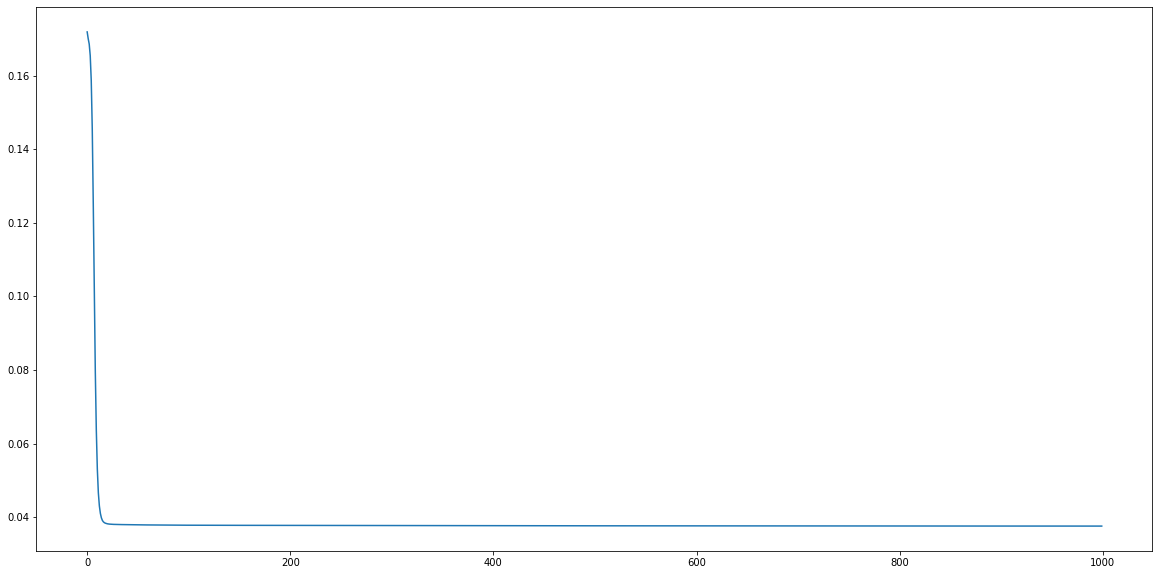

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(Err)
plt.show()

In [ ]:
len(Err)

1000

In [ ]:
Err

[0.17186759017387734,
 0.1700425177104818,
 0.1685677710746662,
 0.16544023613910344,
 0.158733171874638,
 0.14562867440589036,
 0.12515707823239974,
 0.10115506918973316,
 0.07966190177612284,
 0.06358710939231683,
 0.05303985597455305,
 0.04662530288697797,
 0.04305464858055953,
 0.041016625414307256,
 0.0398139498930593,
 0.03909639205458594,
 0.038716053263148836,
 0.03849192789721886,
 0.03835084199294619,
 0.03825509837853218,
 0.03819002894026949,
 0.03814393108427551,
 0.03810972472972532,
 0.03808476463047435,
 0.03806563119867226,
 0.038050187398594074,
 0.03803750285040285,
 0.03802711127647147,
 0.03801839727493049,
 0.038010910345304495,
 0.03800420972245154,
 0.03799808690167353,
 0.03799239102764813,
 0.03798701302657405,
 0.03798187409543614,
 0.03797691734982507,
 0.03797210176417785,
 0.037967397776827186,
 0.03796278410427956,
 0.03795824543367506,
 0.03795377075275698,
 0.03794935831273148,
 0.03794520723598927,
 0.0379410991815999,
 0.037937031153085964,
 0.0379330

将测试集样本放入训练好的网络中

In [ ]:
error_te = []
for it in range(len(data_te)):
    real = data_te.iloc[it, -1]
    net_in = np.array([data_te.iloc[it,0], data_te.iloc[it,1], -1])
    for i in range(4):
        #     nei_in * 所有行的第零列，然后加权求和
        out_in[i] = sigmoid(sum(net_in * w_mid[:,0]))
    res = sigmoid(sum(out_in * w_out))
    error_te.append(abs(real-res))

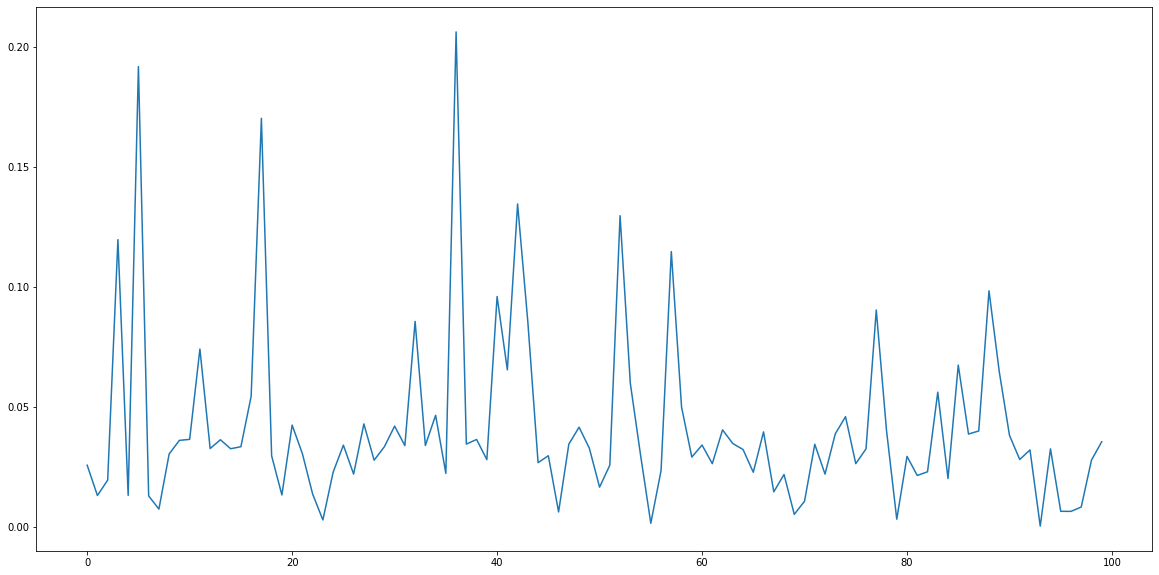

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(error_te)
plt.show()

In [ ]:
np.mean(error_te)

0.04147073027931665

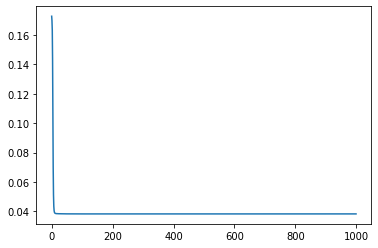

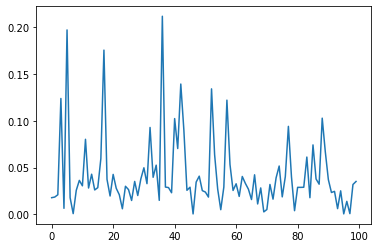

0.03815772548217454

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):    # 网络激活函数
    return 1/(1+np.exp(-x))


data_tr = pd.read_csv('BPdata_tr.txt')  # 训练集样本
data_te = pd.read_csv('BPdata_te.txt')  # 测试集样本
n = len(data_tr)
yita = 0.85  # 学习速率

out_in = np.array([0.0, 0, 0, 0, -1])   # 输出层的输入
w_mid = np.zeros([3, 4])  # 隐层神经元的权值&阈值
w_out = np.zeros([5])     # 输出层神经元的权值&阈值

delta_w_out = np.zeros([5])      # 输出层权值&阈值的修正量
delta_w_mid = np.zeros([3, 4])   # 中间层权值&阈值的修正量
Err = []
'''
模型训练
'''
for j in range(1000):
    error = []
    for it in range(n):
        net_in = np.array([data_tr.iloc[it, 0], data_tr.iloc[it, 1], -1])  # 网络输入
        real = data_tr.iloc[it, 2]
        for i in range(4):
            out_in[i] = sigmoid(sum(net_in * w_mid[:, i]))  # 从输入到隐层的传输过程
        res = sigmoid(sum(out_in * w_out))   # 模型预测值
        error.append(abs(real-res))

        # print(it, '个样本的模型输出：', res, 'real:', real)
        delta_w_out = yita*res*(1-res)*(real-res)*out_in  # 输出层权值的修正量
        delta_w_out[4] = -yita*res*(1-res)*(real-res)     # 输出层阈值的修正量
        w_out = w_out + delta_w_out   # 更新

        for i in range(4):
            delta_w_mid[:, i] = yita*out_in[i]*(1-out_in[i])*w_out[i]*res*(1-res)*(real-res)*net_in   # 中间层神经元的权值修正量
            delta_w_mid[2, i] = -yita*out_in[i]*(1-out_in[i])*w_out[i]*res*(1-res)*(real-res)         # 中间层神经元的阈值修正量
        w_mid = w_mid + delta_w_mid   # 更新
    Err.append(np.mean(error))
plt.plot(Err)
plt.show()
plt.close()

'''
将测试集样本放入训练好的网络中去
'''
error_te = []
for it in range(len(data_te)):
    net_in = np.array([data_te.iloc[it, 0], data_te.iloc[it, 1], -1])  # 网络输入
    real = data_te.iloc[it, 2]
    for i in range(4):
        out_in[i] = sigmoid(sum(net_in * w_mid[:, i]))  # 从输入到隐层的传输过程
    res = sigmoid(sum(out_in * w_out))   # 模型预测值
    error_te.append(abs(real-res))
plt.plot(error_te)
plt.show()
np.mean(error_te)


from sklearn.neural_network import MLPRegressor

'''
调用sklearn实现神经网络算法
'''

data_tr = pd.read_csv('BPdata_tr.txt')  # 训练集样本
data_te = pd.read_csv('BPdata_te.txt')  # 测试集样本

model = MLPRegressor(hidden_layer_sizes=(10,), random_state=10, max_iter=800, learning_rate_init=0.3)  # 构建模型
model.fit(data_tr.iloc[:, :2], data_tr.iloc[:, 2])    # 模型训练
pre = model.predict(data_te.iloc[:, :2])              # 模型预测
err = np.abs(pre - data_te.iloc[:, 2]).mean()         # 模型预测误差
err